In [6]:
pip install kaggle

In [ ]:
# import kagglehub

# path = kagglehub.dataset_download("fatmamtalaat/wellness-dataset-dr-fatma-m-talaat")

# print("Path to dataset files:", path)

100%|██████████| 43.7k/43.7k [00:00<00:00, 41.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fatmamtalaat/wellness-dataset-dr-fatma-m-talaat/versions/1


In [4]:
import pandas as pd  # Import pandas

# Assuming the log tracker file is named 'log_tracker.xlsx'
log_df = pd.read_excel('Log Tracker.xlsx')

# Check the column names to see if they align with the wellness dataset
print(log_df.columns)

Index(['Date', 'Duration of Sleep (hours)', 'Quality of Sleep  (1-10)',
       'Daily Weigh-in', 'BMI Category',
       'Nutrition Intake (calories, breakdown of nutrients, etc.)',
       'Level of Physical Activity (minutes per day)', 'Heart Rate (bpm)',
       'Systolic and Diastolic Blood Pressure',
       'Level of Stress (scale: 1–10)', 'Level of Workload (scale: 1–10)',
       'Environmental Aspects (such as weather and air quality)',
       'Additional health indicators (e.g., water levels, steps)',
       'Emotion Classification', 'Notes'],
      dtype='object')


In [ ]:
import pandas as pd

# Read the log tracker data
log_df = pd.read_excel('Log Tracker.xlsx')

# Rename columns to match wellness dataset
log_df.rename(columns={
    'Duration of Sleep (hours)': 'duration_of_sleep_hours',
    'Level of Physical Activity (minutes per day)': 'level_of_physical_activity_minutes_per_day',
    'Level of Stress (scale: 1–10)': 'level_of_stress_scale_110',
    'Emotion Classification': 'mood_output',
    'Heart Rate (bpm)': 'heart_rate_bpm',
    'Level of Workload (scale: 1–10)': 'level_of_workload_scale_110',
    'BMI Category': 'bmi_category',
    'Nutrition Intake (calories, breakdown of nutrients, etc.)': 'nutrition_intake',
    'Systolic and Diastolic Blood Pressure': 'systolic_and_diastolic_blood_pressure',
    'Environmental Aspects (such as weather and air quality)': 'environmental_aspects',
    'Additional health indicators (e.g., water levels, steps)': 'additional_health_indicators'
}, inplace=True)

# Now, the columns in log_df should match the wellness dataset's column names.

# Display the first few rows to check the changes
print(log_df.head())

# Proceed with preprocessing, e.g., drop missing values, mapping mood values, etc.
# You can now proceed with the same analysis you applied to the wellness dataset


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [9]:
import pandas as pd

# The file will be in the /content directory after you upload it in Colab
excel_path = '/content/Log Tracker.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_path)

# Display the first few rows of the DataFrame
df.head()


,Date,Duration of Sleep (hours),Quality of Sleep (1-10),Daily Weigh-in,BMI Category,"Nutrition Intake (calories, breakdown of nutrients, etc.)",Level of Physical Activity (minutes per day),Heart Rate (bpm),Systolic and Diastolic Blood Pressure,Level of Stress (scale: 1–10),Level of Workload (scale: 1–10),Environmental Aspects (such as weather and air quality),"Additional health indicators (e.g., water levels, steps)",Emotion Classification,Notes
0,2025-03-14,4,5,126.5,Normal,1750,60,71,117/55,6,5,"Sunny, Good Air Quality","1.5 Liter, 1000 Steps",Negative,"Barely had any sleep, feeling terrible"
1,2025-03-15,5,5,126.0,Normal,1700,20,69,114/53,5,4,"Cloudy, Good Air Quality","1.25 Liter, 2105 Steps",Neutral,Regular day
2,2025-03-16,6,6,125.6,Normal,1800 (High in Protein),75,68,111/51,3,4,"Cloudy, Good Air Quality","1 Liter, 8851 Steps",Positive,"Went out for a long jog, I enjoyed it"
3,2025-03-17,6,6,126.2,Normal,"1900 (High in Carbs, Balanced)",80,70,102/55,2,4,"Cloudy, Good Air Quality","0.75 Liter, 2251 Steps",Positive,"Went out for a short jog and lifted weights, i..."
4,2025-03-18,7,7,126.8,Normal,"1760 (Low in Protein, Healthy)",90,67,118/53,3,3,"Sunny, Good Air Quality","0.85 Liter, 11080 Steps",Positive,"Went out for a long jog, good weather, it was ..."


In [10]:
print(df.columns.tolist())


['Date', 'Duration of Sleep (hours)', 'Quality of Sleep  (1-10)', 'Daily Weigh-in', 'BMI Category', 'Nutrition Intake (calories, breakdown of nutrients, etc.)', 'Level of Physical Activity (minutes per day)', 'Heart Rate (bpm)', 'Systolic and Diastolic Blood Pressure', 'Level of Stress (scale: 1–10)', 'Level of Workload (scale: 1–10)', 'Environmental Aspects (such as weather and air quality)', 'Additional health indicators (e.g., water levels, steps)', 'Emotion Classification', 'Notes']


In [ ]:
# cols = df.columns
# corr_matrix = df[cols].corr()['mood_output']

# print(corr_matrix)

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Check if 'mood_output_encoded' exists (which should be the numeric version of mood)
if 'mood_output_encoded' in numeric_df.columns:
    corr_matrix = numeric_df.corr()['mood_output_encoded']
    print(corr_matrix)
else:
    print("Make sure you have an encoded 'mood_output_encoded' column.")


Make sure you have an encoded 'mood_output_encoded' column.


In [12]:
print(df.columns.tolist())


['Date', 'Duration of Sleep (hours)', 'Quality of Sleep  (1-10)', 'Daily Weigh-in', 'BMI Category', 'Nutrition Intake (calories, breakdown of nutrients, etc.)', 'Level of Physical Activity (minutes per day)', 'Heart Rate (bpm)', 'Systolic and Diastolic Blood Pressure', 'Level of Stress (scale: 1–10)', 'Level of Workload (scale: 1–10)', 'Environmental Aspects (such as weather and air quality)', 'Additional health indicators (e.g., water levels, steps)', 'Emotion Classification', 'Notes']


In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Emotion Classification' column
if df['Emotion Classification'].dtype == 'object':
    le = LabelEncoder()
    df['mood_output_encoded'] = le.fit_transform(df['Emotion Classification'])

# Compute correlations with the numeric columns
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()['mood_output_encoded']

# Print the sorted correlation values
print(corr_matrix.sort_values(ascending=False))


mood_output_encoded                             1.000000
Duration of Sleep (hours)                       0.690789
Quality of Sleep  (1-10)                        0.653193
Heart Rate (bpm)                                0.187871
Level of Physical Activity (minutes per day)    0.169333
Daily Weigh-in                                 -0.139006
Level of Workload (scale: 1–10)                -0.696417
Level of Stress (scale: 1–10)                  -0.722488
Name: mood_output_encoded, dtype: float64


In [15]:
import re

def extract_steps(text):
    match = re.search(r'(\d{3,5})', str(text))  # Match step counts like 1000–99999
    return int(match.group(1)) if match else 0

df['extracted_steps'] = df['Additional health indicators (e.g., water levels, steps)'].apply(extract_steps)


In [16]:
# Clean column names: lowercase, underscores, remove punctuation
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[^\w\s]", "", regex=True)
    .str.replace(r"\s+", "_", regex=True)
)

print(df.columns.tolist())


['date', 'duration_of_sleep_hours', 'quality_of_sleep_110', 'daily_weighin', 'bmi_category', 'nutrition_intake_calories_breakdown_of_nutrients_etc', 'level_of_physical_activity_minutes_per_day', 'heart_rate_bpm', 'systolic_and_diastolic_blood_pressure', 'level_of_stress_scale_110', 'level_of_workload_scale_110', 'environmental_aspects_such_as_weather_and_air_quality', 'additional_health_indicators_eg_water_levels_steps', 'emotion_classification', 'notes', 'mood_output_encoded', 'extracted_steps']


In [ ]:
# def classify_activity_level(minutes, steps):
#     score = minutes + (steps / 100)  # tweak weight if needed
#     if score < 20:
#         return 'SEDENTARY'
#     elif 20 <= score < 60:
#         return 'MODERATELY_ACTIVE'
#     else:
#         return 'ACTIVE'

df['activity_level_grouping'] = df.apply(lambda row: classify_activity_level(
    row['level_of_physical_activity_minutes_per_day'],
    row['extracted_steps']
), axis=1)


In [19]:
# Make sure activity level classification is applied
df['activity_level_grouping'] = df.apply(classify_activity_level, axis=1)

# Now check the first 10 rows of the relevant columns
print(df[['level_of_physical_activity_minutes_per_day', 'extracted_steps', 'activity_level_grouping']].head(10))


   level_of_physical_activity_minutes_per_day  extracted_steps  \
0                                          60             1000   
1                                          20             2105   
2                                          75             8851   
3                                          80             2251   
4                                          90            11080   
5                                          75             8910   
6                                          20              500   
7                                          15              600   
8                                          45             6951   
9                                          10              200   

  activity_level_grouping  
0               Sedentary  
1               Sedentary  
2               Sedentary  
3               Sedentary  
4               Sedentary  
5               Sedentary  
6               Sedentary  
7               Sedentary  
8               Seden

In [20]:
df['activity_level_grouping'].value_counts()


,count
activity_level_grouping,
Sedentary,34


In [21]:
print(df.columns.tolist())


['date', 'duration_of_sleep_hours', 'quality_of_sleep_110', 'daily_weighin', 'bmi_category', 'nutrition_intake_calories_breakdown_of_nutrients_etc', 'level_of_physical_activity_minutes_per_day', 'heart_rate_bpm', 'systolic_and_diastolic_blood_pressure', 'level_of_stress_scale_110', 'level_of_workload_scale_110', 'environmental_aspects_such_as_weather_and_air_quality', 'additional_health_indicators_eg_water_levels_steps', 'emotion_classification', 'notes', 'mood_output_encoded', 'extracted_steps', 'activity_level_grouping']


In [22]:
# Standardize all column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
from sklearn.preprocessing import LabelEncoder

if 'mood_output' in df.columns:
    if df['mood_output'].dtype == 'object':
        le = LabelEncoder()
        df['mood_output_encoded'] = le.fit_transform(df['mood_output'])
        target_col = 'mood_output_encoded'
    else:
        target_col = 'mood_output'

    numeric_df = df.select_dtypes(include='number')
    corr_matrix = numeric_df.corr()[target_col].sort_values(ascending=False)
    print(corr_matrix)
else:
    print("Column 'mood_output' not found.")


mood_output_encoded                           1.000000
level_of_workload_scale_110                   0.879303
level_of_stress_scale_110                     0.836217
heart_rate_bpm                                0.552565
level_of_physical_activity_minutes_per_day   -0.278266
duration_of_sleep_hours                      -0.529095
extracted_steps                              -0.541513
Name: mood_output_encoded, dtype: float64


In [23]:
# Clean column names: lowercase, underscores, remove punctuation
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[^\w\s]", "", regex=True)
    .str.replace(r"\s+", "_", regex=True)
)

print(df.columns.tolist())


['date', 'duration_of_sleep_hours', 'quality_of_sleep_110', 'daily_weighin', 'bmi_category', 'nutrition_intake_calories_breakdown_of_nutrients_etc', 'level_of_physical_activity_minutes_per_day', 'heart_rate_bpm', 'systolic_and_diastolic_blood_pressure', 'level_of_stress_scale_110', 'level_of_workload_scale_110', 'environmental_aspects_such_as_weather_and_air_quality', 'additional_health_indicators_eg_water_levels_steps', 'emotion_classification', 'notes', 'mood_output_encoded', 'extracted_steps', 'activity_level_grouping']


## 1. Demographic Health Grouping

In [ ]:
# #delete
# def calculate_bmi(weight_kg, height_cm):
#     # Helper function to calculate BMI
#     height_m = height_cm / 100
#     return weight_kg / (height_m ** 2)

# def get_recommended_calories(age, gender, activity_minutes):
#     # Helper function to get recommended daily calorie intake
#     if gender.lower() == 'male':
#         if age < 30:
#             base = 2500
#         elif age < 50:
#             base = 2400
#         else:
#             # base = 2200
#     else:  # female
#         if age < 30:
#             base = 2000
#         elif age < 50:
#             base = 1900
#         else:
#             base = 1800

#     # Adjust based on activity level
#     if activity_minutes >= 60:
#         adjustment = 200  # active
#     elif activity_minutes >= 30:
#         adjustment = 100  # moderately active
#     else:
#         adjustment = 0  # sedentary

#     return base + adjustment

# def classify_demographic_grouping(row):
#     age = 25  # fallback age
#     gender = 'female'  # fallback gender
#     activity_minutes = float(row.get('physical_activity_minutes', 20))

#     try:
#         nutrition_intake = float(row['nutrition_intake_calories_breakdown_of_nutrients_etc'])
#     except (ValueError, TypeError):
#         return 'UNHEALTHY_CONSUMPTION'

#     height_cm = row.get('height_cm')
#     weight_kg = row.get('weight_kg')

#     try:
#         if height_cm and weight_kg:
#             bmi = calculate_bmi(float(weight_kg), float(height_cm))
#         else:
#             category = str(row.get('bmi_category', 'normal')).lower()
#             bmi_values = {'underweight': 17, 'normal': 22, 'overweight': 27, 'obese': 32}
#             bmi = bmi_values.get(category, 22)
#     except (ValueError, TypeError):
#         bmi = 22

#     print(f"BMI: {bmi}")

#     if bmi < 18.5:
#         bmi_category = 'underweight'
#     elif 25 <= bmi < 30:
#         bmi_category = 'overweight'
#     elif bmi >= 30:
#         bmi_category = 'obese'
#     else:
#         bmi_category = 'normal'

#     print(f"BMI Category: {bmi_category}")

#     factor = {'underweight': 1.25, 'normal': 1.0, 'overweight': 0.7, 'obese': 0.7}[bmi_category]
#     recommended = get_recommended_calories(age, gender, activity_minutes)
#     target = recommended * factor

#     print(f"Recommended Calories: {recommended}")
#     print(f"Target Calories: {target}")

#     if 18.5 <= bmi <= 24.9 and abs(nutrition_intake - target) <= 200:
#         return 'HEALTHY_CONSUMPTION'
#     elif 18 <= bmi <= 26 and abs(nutrition_intake - target) <= 300:
#         return 'NEUTRAL_CONSUMPTION'
#     else:
#         return 'UNHEALTHY_CONSUMPTION'


In [52]:
import pandas as pd

# Read both Excel files
df_log_tracker = pd.read_excel("Log Tracker.xlsx")
df_log_tracker_daily = pd.read_excel("Log Tracker_ daily questions.xlsx")

# Merge the two dataframes on a common column (e.g., 'Date', adjust the column name if needed)
df = pd.merge(df_log_tracker, df_log_tracker_daily, on="Date", how="left")

# Function to calculate BMI
def calculate_bmi(weight_kg, height_cm):
    if height_cm == 0 or weight_kg == 0:
        return None
    height_m = height_cm / 100
    return weight_kg / (height_m ** 2)

# Function to calculate recommended calories
def get_recommended_calories(age, gender, weight_kg, height_cm, activity_minutes):
    # Ensure values are valid numbers
    if age is None or weight_kg is None or height_cm is None or gender is None:
        return None

    # Simplified formula (Mifflin-St Jeor equation)
    if gender == 'female':
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age - 161
    else:
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age + 5

    # Calculate the recommended calories based on activity level
    if activity_minutes <= 30:
        activity_factor = 1.2
    elif 30 < activity_minutes <= 60:
        activity_factor = 1.375
    elif 60 < activity_minutes <= 90:
        activity_factor = 1.55
    else:
        activity_factor = 1.725

    recommended_calories = bmr * activity_factor
    return recommended_calories

# Function to classify demographic grouping
def classify_demographic_grouping(row):
    # Extract age, gender, weight, height, and activity from the daily log tracker data
    age = row.get('Age', None)  # Replace 'Age' with the actual column name from the 'Log Tracker Daily Question.xlsx'
    gender = row.get('Gender', None)  # Replace 'Gender' with the actual column name from the 'Log Tracker Daily Question.xlsx'
    activity_minutes = float(row.get('Level of Physical Activity (minutes per day)_x', 20))  # Default activity time in minutes
    # Check if essential columns are missing values
    if age is None or gender is None:
        return 'MISSING_DATA'
    # Extract nutrition intake from the 'Nutrition Intake' column
    try:
        nutrition_text = str(row['Nutrition Intake (calories, breakdown of nutrients, etc.)_x'])
        nutrition_intake = float(nutrition_text.split('calories')[0].strip())
    except (ValueError, TypeError, AttributeError, IndexError):
        return 'UNHEALTHY_CONSUMPTION'

    # Extract height and weight from the log tracker daily data
    height_cm = row.get('height_cm', None)
    weight_kg = row.get('weight_kg', None)

    # Check for missing height and weight data
    if height_cm is None or weight_kg is None:
        return 'MISSING_DATA'

    # Calculate BMI if height and weight are available, else use category-based BMI value
    try:
        bmi = calculate_bmi(float(weight_kg), float(height_cm))
    except (ValueError, TypeError):
        bmi = 22  # Default fallback BMI if invalid data exists

    # Determine BMI category
    if bmi < 18.5:
        bmi_category = 'underweight'
    elif 25 <= bmi < 30:
        bmi_category = 'overweight'
    elif bmi >= 30:
        bmi_category = 'obese'
    else:
        bmi_category = 'normal'

    # Calculate the recommended calorie intake based on activity level
    factor = {'underweight': 1.25, 'normal': 1.0, 'overweight': 0.7, 'obese': 0.7}[bmi_category]
    recommended = get_recommended_calories(age, gender, weight_kg, height_cm, activity_minutes)

    if recommended is None:
        return 'MISSING_DATA'

    target = recommended * factor

    # Classify consumption based on BMI and nutrition intake
    if 18.5 <= bmi <= 24.9 and abs(nutrition_intake - target) <= 200:
        return 'HEALTHY_CONSUMPTION'
    elif 18 <= bmi <= 26 and abs(nutrition_intake - target) <= 300:
        return 'NEUTRAL_CONSUMPTION'
    else:
        return 'UNHEALTHY_CONSUMPTION'

# Apply classification to the dataset
df['Consumption Classification'] = df.apply(classify_demographic_grouping, axis=1)

# Display the updated columns and the first few rows of the DataFrame
print("Updated DataFrame:")
print(df.head())

# Save the processed data to a CSV file
df.to_csv("processed_health_data_w.csv", index=False)


Updated DataFrame:
        Date  Duration of Sleep (hours)_x  Quality of Sleep  (1-10)_x  \
0 2025-03-14                            4                           5   
1 2025-03-15                            5                           5   
2 2025-03-16                            6                           6   
3 2025-03-17                            6                           6   
4 2025-03-18                            7                           7   

   Daily Weigh-in_x BMI Category_x  \
0             126.5         Normal   
1             126.0         Normal   
2             125.6         Normal   
3             126.2         Normal   
4             126.8         Normal   

  Nutrition Intake (calories, breakdown of nutrients, etc.)_x  \
0                                               1750            
1                                               1700            
2                             1800 (High in Protein)            
3                     1900 (High in Carbs, Balanced) 

In [53]:
# Display the final processed dataset with the correct column names including '_y' for log tracker dataset
print(merged_df[['Date',
                 'BMI Category_y',
                 'Level of Physical Activity (minutes per day)_y',
                 'Heart Rate (bpm)_y',
                 'Level of Stress (scale: 1–10)_y',
                 'Emotion Classification_y']].head())


        Date BMI Category_y  Level of Physical Activity (minutes per day)_y  \
0 2025-03-14         Normal                                              60   
1 2025-03-15         Normal                                              20   
2 2025-03-16         Normal                                              75   
3 2025-03-17         Normal                                              80   
4 2025-03-18         Normal                                              90   

   Heart Rate (bpm)_y  Level of Stress (scale: 1–10)_y  \
0                  71                                6   
1                  69                                5   
2                  68                                3   
3                  70                                2   
4                  67                                3   

  Emotion Classification_y  
0                 Negative  
1                  Neutral  
2                 Positive  
3                 Positive  
4                 Positive  


In [ ]:
# #
# # Apply cleaning function to create the 'steps_cleaned' column
# df['steps_cleaned'] = df.apply(clean_steps_data, axis=1)

# # Apply classification to the dataset for activity level
# df['activity_level_grouping'] = df.apply(classify_activity_level, axis=1)

# # Apply classification for Consumption based on BMI, activity, and nutrition
# df['Consumption Classification'] = df.apply(classify_demographic_grouping, axis=1)

# # Save to CSV after all transformations
# df.to_csv("processed_health_data_w.csv", index=False)

# # Display final DataFrame for verification
# print(df[[

#           'activity_level_grouping', 'Consumption Classification',
#           'steps_cleaned']])


    activity_level_grouping Consumption Classification  steps_cleaned
0         Moderately Active        HEALTHY_CONSUMPTION              0
1         Moderately Active      UNHEALTHY_CONSUMPTION           8000
2                 Sedentary      UNHEALTHY_CONSUMPTION           5000
3                    Active        HEALTHY_CONSUMPTION          12000
4                 Sedentary      UNHEALTHY_CONSUMPTION           3000
..                      ...                        ...            ...
732       Moderately Active      UNHEALTHY_CONSUMPTION           8500
733               Sedentary      UNHEALTHY_CONSUMPTION           5500
734                  Active        HEALTHY_CONSUMPTION          12500
735               Sedentary      UNHEALTHY_CONSUMPTION           3500
736       Moderately Active        HEALTHY_CONSUMPTION           9500

[737 rows x 3 columns]


## 2. Lifestyle Grouping

In [57]:
def classify_lifestyle_grouping(row, age_group='adult'):
    # Use the correct columns from the merged DataFrame
    sleep_hours = row['Duration of Sleep (hours)_x']  # Or use '_y' depending on your dataset
    heart_rate = row['Heart Rate (bpm)_x']  # Or use '_y' depending on your dataset
    blood_pressure = row['Systolic and Diastolic Blood Pressure_x']  # Or use '_y' depending on your dataset

    # Define good sleep ranges by age group
    sleep_ranges = {
        'adult': (7, 9),
        'young_adult': (7, 9),
        'older_adult': (7, 8)
    }
    sleep_good_range = sleep_ranges.get(age_group, (7, 9))

    # Parse BP safely
    systolic, diastolic = 120, 80
    if isinstance(blood_pressure, str) and '/' in blood_pressure:
        try:
            systolic, diastolic = map(int, blood_pressure.split('/'))
        except ValueError:
            pass  # fallback defaults

    # Evaluate individual metrics
    good_sleep = sleep_good_range[0] <= sleep_hours <= sleep_good_range[1]
    good_heart = 60 <= heart_rate <= 100
    good_bp = systolic < 130 and diastolic < 80

    # Create descriptive labels
    sleep_health = 'GOOD_SLEEP' if good_sleep else 'POOR_SLEEP'
    heart_health = 'GOOD_HEART_RATE' if good_heart else 'POOR_HEART_RATE'
    bp_health = 'GOOD_BLOOD_PRESSURE' if good_bp else 'POOR_BLOOD_PRESSURE'



    return pd.Series([sleep_health, heart_health, bp_health])

# Apply to dataframe and assign new columns
df[['sleep_health', 'heart_health', 'bp_health']] = df.apply(
    lambda row: classify_lifestyle_grouping(row),
    axis=1
)

# Display the updated DataFrame
print(df[['Date', 'sleep_health', 'heart_health', 'bp_health']].head())


        Date sleep_health     heart_health            bp_health
0 2025-03-14   POOR_SLEEP  GOOD_HEART_RATE  GOOD_BLOOD_PRESSURE
1 2025-03-15   POOR_SLEEP  GOOD_HEART_RATE  GOOD_BLOOD_PRESSURE
2 2025-03-16   POOR_SLEEP  GOOD_HEART_RATE  GOOD_BLOOD_PRESSURE
3 2025-03-17   POOR_SLEEP  GOOD_HEART_RATE  GOOD_BLOOD_PRESSURE
4 2025-03-18   GOOD_SLEEP  GOOD_HEART_RATE  GOOD_BLOOD_PRESSURE


In [59]:
df[[
    'sleep_health', 'heart_health', 'bp_health']].head()


,sleep_health,heart_health,bp_health
0,POOR_SLEEP,GOOD_HEART_RATE,GOOD_BLOOD_PRESSURE
1,POOR_SLEEP,GOOD_HEART_RATE,GOOD_BLOOD_PRESSURE
2,POOR_SLEEP,GOOD_HEART_RATE,GOOD_BLOOD_PRESSURE
3,POOR_SLEEP,GOOD_HEART_RATE,GOOD_BLOOD_PRESSURE
4,GOOD_SLEEP,GOOD_HEART_RATE,GOOD_BLOOD_PRESSURE


## 3. Activity Level Grouping

In [ ]:
import pandas as pd


# Extract steps data from the 'Additional health indicators'
df['Steps'] = df['Additional health indicators (e.g., water levels, steps)'].str.extract('(\d+)').astype(float)

# Function to classify Activity Level
def classify_activity_level(minutes, steps):
    if pd.isna(steps) or pd.isna(minutes):
        return 'UNKNOWN'
    steps = float(steps)
    minutes = float(minutes)

    if steps < 5000 and minutes < 30:
        return 'SEDENTARY'
    elif (5000 <= steps < 7500) or (30 <= minutes < 45):
        return 'LIGHTLY_ACTIVE'
    elif (7500 <= steps < 10000) or (45 <= minutes < 60):
        return 'SOMEWHAT_ACTIVE'
    elif (10000 <= steps < 12500) or (60 <= minutes < 75):
        return 'ACTIVE'
    else:
        return 'HIGHLY_ACTIVE'

# Apply Activity Level Classification
df['Activity Level'] = df.apply(
    lambda row: classify_activity_level(
        row['Level of Physical Activity (minutes per day)'],
        row['Steps']
    ),
    axis=1
)

# Function to classify Mood based on Stress, Sleep, and Activity Level
def classify_mood(stress, sleep, activity_level):
    if stress <= 3 and sleep >= 7 and activity_level in ['ACTIVE', 'HIGHLY_ACTIVE']:
        return 'Happy'
    elif stress <= 6 and activity_level in ['LIGHTLY_ACTIVE', 'SOMEWHAT_ACTIVE']:
        return 'Neutral'
    else:
        return 'Sad'

# # Apply Mood Classification
# df['Mood Classification'] = df.apply(
#     lambda row: classify_mood(
#         row['Level of Stress (scale: 1–10)'],
#         row['Duration of Sleep (hours)'],
#         row['Activity Level']
#     ),
#     axis=1
# )

# Preview the DataFrame with new classifications
print(df[['Duration of Sleep (hours)',
          'Level of Physical Activity (minutes per day)',
          'Level of Stress (scale: 1–10)',
          'Steps',
          'Activity Level',
          ]])


     Duration of Sleep (hours)  Level of Physical Activity (minutes per day)  \
0                          7.5                                            30   
1                          6.8                                            45   
2                          8.2                                            15   
3                          7.0                                            60   
4                          5.5                                            10   
..                         ...                                           ...   
732                        6.6                                            45   
733                        8.0                                            15   
734                        7.4                                            60   
735                        5.2                                            10   
736                        7.6                                            30   

     Level of Stress (scale: 1–10)  Ste

In [61]:
import pandas as pd

# Extract steps data from the 'Additional health indicators'
df['Steps'] = df['Additional health indicators (e.g., water levels, steps)_x'].str.extract('(\d+)').astype(float)
# If you want to use '_y' instead, change `_x` to `_y`

# Function to classify Activity Level
def classify_activity_level(minutes, steps):
    if pd.isna(steps) or pd.isna(minutes):
        return 'UNKNOWN'
    steps = float(steps)
    minutes = float(minutes)

    if steps < 5000 and minutes < 30:
        return 'SEDENTARY'
    elif (5000 <= steps < 7500) or (30 <= minutes < 45):
        return 'LIGHTLY_ACTIVE'
    elif (7500 <= steps < 10000) or (45 <= minutes < 60):
        return 'SOMEWHAT_ACTIVE'
    elif (10000 <= steps < 12500) or (60 <= minutes < 75):
        return 'ACTIVE'
    else:
        return 'HIGHLY_ACTIVE'

# Apply Activity Level Classification
df['Activity Level'] = df.apply(
    lambda row: classify_activity_level(
        row['Level of Physical Activity (minutes per day)_x'],  # Corrected column
        row['Steps']
    ),
    axis=1
)


# Preview the DataFrame with new classifications
print(df[['Duration of Sleep (hours)_x',
          'Level of Physical Activity (minutes per day)_x',
          'Level of Stress (scale: 1–10)_x',
          'Steps',
          'Activity Level'
          ]])


    Duration of Sleep (hours)_x  \
0                             4   
1                             5   
2                             6   
3                             6   
4                             7   
5                             5   
6                             5   
7                             5   
8                             5   
9                             6   
10                            5   
11                            6   
12                            5   
13                            5   
14                            7   
15                            4   
16                            5   
17                            6   
18                            8   
19                            5   
20                            5   
21                            7   
22                            5   
23                            3   
24                            5   
25                            6   
26                            7   
27                  

In [ ]:
#df['steps_cleaned'] = df['steps_cleaned'].fillna(0)


In [63]:
print(df['Activity Level'].value_counts())
print(df.head())


Activity Level
SEDENTARY          24
HIGHLY_ACTIVE       5
ACTIVE              3
SOMEWHAT_ACTIVE     2
Name: count, dtype: int64
        Date  Duration of Sleep (hours)_x  Quality of Sleep  (1-10)_x  \
0 2025-03-14                            4                           5   
1 2025-03-15                            5                           5   
2 2025-03-16                            6                           6   
3 2025-03-17                            6                           6   
4 2025-03-18                            7                           7   

   Daily Weigh-in_x BMI Category_x  \
0             126.5         Normal   
1             126.0         Normal   
2             125.6         Normal   
3             126.2         Normal   
4             126.8         Normal   

  Nutrition Intake (calories, breakdown of nutrients, etc.)_x  \
0                                               1750            
1                                               1700            
2       

## 4. Stress Profile Grouping

In [67]:
def classify_stress(stress):
    if stress <= 4:
        return 'LOW_STRESS'
    elif 5 <= stress <= 7:
        return 'MEDIUM_STRESS'
    else:
        return 'HIGH_STRESS'

def classify_workload(workload):
    if workload <= 4:
        return 'LOW_WORKLOAD'
    elif 5 <= workload <= 7:
        return 'MEDIUM_WORKLOAD'
    else:
        return 'HIGH_WORKLOAD'

# Use _x or _y depending on which set you want (probably _x if that's your main)

df['stress_profile_grouping'] = df['Level of Stress (scale: 1–10)_x'].apply(classify_stress)
df['workload_profile_grouping'] = df['Level of Workload (scale: 1–10)_x'].apply(classify_workload)

# Preview
print(df[['Level of Stress (scale: 1–10)_x', 'stress_profile_grouping',
          'Level of Workload (scale: 1–10)_x', 'workload_profile_grouping']].head())



   Level of Stress (scale: 1–10)_x stress_profile_grouping  \
0                                6           MEDIUM_STRESS   
1                                5           MEDIUM_STRESS   
2                                3              LOW_STRESS   
3                                2              LOW_STRESS   
4                                3              LOW_STRESS   

   Level of Workload (scale: 1–10)_x workload_profile_grouping  
0                                  5           MEDIUM_WORKLOAD  
1                                  4              LOW_WORKLOAD  
2                                  4              LOW_WORKLOAD  
3                                  4              LOW_WORKLOAD  
4                                  3              LOW_WORKLOAD  


In [68]:
print(df['stress_profile_grouping'].value_counts())
print(df.head())


stress_profile_grouping
MEDIUM_STRESS    18
LOW_STRESS       15
HIGH_STRESS       1
Name: count, dtype: int64
        Date  Duration of Sleep (hours)_x  Quality of Sleep  (1-10)_x  \
0 2025-03-14                            4                           5   
1 2025-03-15                            5                           5   
2 2025-03-16                            6                           6   
3 2025-03-17                            6                           6   
4 2025-03-18                            7                           7   

   Daily Weigh-in_x BMI Category_x  \
0             126.5         Normal   
1             126.0         Normal   
2             125.6         Normal   
3             126.2         Normal   
4             126.8         Normal   

  Nutrition Intake (calories, breakdown of nutrients, etc.)_x  \
0                                               1750            
1                                               1700            
2                          

## 5. Social Wellness Grouping

In [69]:
%pip install transformers


In [70]:
# Check the columns in your DataFrame
print(df.columns)


Index(['Date', 'Duration of Sleep (hours)_x', 'Quality of Sleep  (1-10)_x',
       'Daily Weigh-in_x', 'BMI Category_x',
       'Nutrition Intake (calories, breakdown of nutrients, etc.)_x',
       'Level of Physical Activity (minutes per day)_x', 'Heart Rate (bpm)_x',
       'Systolic and Diastolic Blood Pressure_x',
       'Level of Stress (scale: 1–10)_x', 'Level of Workload (scale: 1–10)_x',
       'Environmental Aspects (such as weather and air quality)_x',
       'Additional health indicators (e.g., water levels, steps)_x',
       'Emotion Classification_x', 'Notes_x', 'Duration of Sleep (hours)_y',
       'Quality of Sleep  (1-10)_y', 'Daily Weigh-in_y', 'BMI Category_y',
       'Nutrition Intake (calories, breakdown of nutrients, etc.)_y',
       'Level of Physical Activity (minutes per day)_y', 'Heart Rate (bpm)_y',
       'Systolic and Diastolic Blood Pressure_y',
       'Level of Stress (scale: 1–10)_y', 'Level of Workload (scale: 1–10)_y',
       'Environmental Aspects (suc

In [71]:
from transformers import pipeline
import pandas as pd

# Note:
# - The facebook/bart-large-mnli model used here is a pre-trained model without fine-tuning on our specific data.
# - It has ~406 million parameters and achieves:
#   • ~84.6% accuracy on the MNLI matched set
#   • ~83.4% accuracy on the MNLI mismatched set
# - Citation for the model: Lewis et al., 2019 ("BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension")
#   Paper: https://arxiv.org/abs/1910.13461
# - Model card: https://huggingface.co/facebook/bart-large-mnli

# Load the model once
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define your candidate labels
labels = ['HIGH_SOCIAL', 'MODERATE_SOCIAL', 'LOW_SOCIAL']

# Handle missing column/key issue
if 'Quality or frequency of social interactions' not in df.columns:
    raise KeyError("Column 'Quality or frequency of social interactions' not found in DataFrame")

# Step 1: Extract unique values to avoid redundant computation
unique_values = df['Quality or frequency of social interactions'].dropna().unique()

# Step 2: Create a dictionary to store classification results
classification_map = {}

# Step 3: Classify each unique value
for val in unique_values:
    val_str = str(val).lower()
    result = classifier(val_str, candidate_labels=labels)
    classification_map[val] = result['labels'][0]

# Step 4: Map results back to DataFrame
df['social_wellness_grouping'] = df['Quality or frequency of social interactions'].map(classification_map)

# Preview the result
print(df[['Quality or frequency of social interactions', 'social_wellness_grouping']].head())



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


KeyError: "Column 'Quality or frequency of social interactions' not found in DataFrame"

In [75]:
from transformers import pipeline
import pandas as pd

# Note:
# - The facebook/bart-large-mnli model used here is a pre-trained model without fine-tuning on our specific data.
# - It has ~406 million parameters and achieves:
#   • ~84.6% accuracy on the MNLI matched set
#   • ~83.4% accuracy on the MNLI mismatched set
# - Citation for the model: Lewis et al., 2019 ("BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension")
#   Paper: https://arxiv.org/abs/1910.13461
# - Model card: https://huggingface.co/facebook/bart-large-mnli

# Load the model once
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define your candidate labels
labels = ['HIGH_SOCIAL', 'MODERATE_SOCIAL', 'LOW_SOCIAL']

col_name = 'Emotion Classification_x'

if col_name not in df.columns:
    raise KeyError(f"Column '{col_name}' not found in DataFrame")

# Rest of your code
unique_values = df[col_name].dropna().unique()

classification_map = {}

for val in unique_values:
    val_str = str(val).lower()
    result = classifier(val_str, candidate_labels=labels)
    classification_map[val] = result['labels'][0]

df['social_wellness_grouping'] = df[col_name].map(classification_map)

print(df[[col_name, 'social_wellness_grouping']].head())



Device set to use cpu


  Emotion Classification_x social_wellness_grouping
0                 Negative               LOW_SOCIAL
1                  Neutral          MODERATE_SOCIAL
2                 Positive              HIGH_SOCIAL
3                 Positive              HIGH_SOCIAL
4                 Positive              HIGH_SOCIAL


## 6. Environmental Stress Grouping

In [76]:
import requests

def fetch_weather_data(city_name, api_key):
    """
    Fetch current weather description from WeatherAPI for a given city.
    """
    url = f'http://api.weatherapi.com/v1/current.json?key={api_key}&q={city_name}'
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        if 'current' in data and 'condition' in data['current']:
            return data['current']['condition']['text']
        else:
            print("Warning: Weather data structure is incomplete.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return None


def classify_weather_situation(weather_description):
    """
    Classify weather condition into one of: SUNNY, RAINY, CLOUDY, WINDY, or UNKNOWN.
    """
    description = weather_description.lower()

    if 'sunny' in description:
        return 'SUNNY'
    elif 'rain' in description or 'shower' in description:
        return 'RAINY'
    elif 'overcast' in description or 'cloud' in description:
        return 'CLOUDY'
    elif 'wind' in description:
        return 'WINDY'
    else:
        return 'UNKNOWN'

# Define the API key and city name
api_key = '08ad6c19fbb84d3d8de213011252104'
city_name = 'Boston'

# Fetch the weather description
weather_description = fetch_weather_data(city_name, api_key)

if weather_description:
    weather_situation = classify_weather_situation(weather_description)
    print(f"City: {city_name}")
    print(f"Weather Description: {weather_description}")
    print(f"Classified Weather Situation: {weather_situation}")
else:
    print("Unable to fetch or classify weather data.")


City: Boston
Weather Description: Overcast
Classified Weather Situation: CLOUDY


# View the processed DataFrame

In [77]:
# --- Check Specific Columns ---
# This step ensures the required columns are present before further processing

# Print all column names to confirm structure
print("Columns in the DataFrame:\n", df.columns.tolist())

# Check existence of specific columns
columns_to_check = ['quality_or_frequency_of_social_interactions', 'social_wellness_grouping']
for col in columns_to_check:
    if col in df.columns:
        print(f"\nColumn '{col}' exists. Here are the first few values:")
        print(df[col].head())
    else:
        print(f"\nColumn '{col}' is missing from the DataFrame.")


Columns in the DataFrame:
 ['Date', 'Duration of Sleep (hours)_x', 'Quality of Sleep  (1-10)_x', 'Daily Weigh-in_x', 'BMI Category_x', 'Nutrition Intake (calories, breakdown of nutrients, etc.)_x', 'Level of Physical Activity (minutes per day)_x', 'Heart Rate (bpm)_x', 'Systolic and Diastolic Blood Pressure_x', 'Level of Stress (scale: 1–10)_x', 'Level of Workload (scale: 1–10)_x', 'Environmental Aspects (such as weather and air quality)_x', 'Additional health indicators (e.g., water levels, steps)_x', 'Emotion Classification_x', 'Notes_x', 'Duration of Sleep (hours)_y', 'Quality of Sleep  (1-10)_y', 'Daily Weigh-in_y', 'BMI Category_y', 'Nutrition Intake (calories, breakdown of nutrients, etc.)_y', 'Level of Physical Activity (minutes per day)_y', 'Heart Rate (bpm)_y', 'Systolic and Diastolic Blood Pressure_y', 'Level of Stress (scale: 1–10)_y', 'Level of Workload (scale: 1–10)_y', 'Environmental Aspects (such as weather and air quality)_y', 'Additional health indicators (e.g., water 

In [78]:
print("Columns in the DataFrame:\n", df.columns.tolist())

columns_to_check = ['quality_or_frequency_of_social_interactions', 'social_wellness_grouping']
for col in columns_to_check:
    if col in df.columns:
        print(f"\nColumn '{col}' exists. Here are the first few values:")
        print(df[col].head())
    else:
        print(f"\nColumn '{col}' is missing from the DataFrame.")


Columns in the DataFrame:
 ['Date', 'Duration of Sleep (hours)_x', 'Quality of Sleep  (1-10)_x', 'Daily Weigh-in_x', 'BMI Category_x', 'Nutrition Intake (calories, breakdown of nutrients, etc.)_x', 'Level of Physical Activity (minutes per day)_x', 'Heart Rate (bpm)_x', 'Systolic and Diastolic Blood Pressure_x', 'Level of Stress (scale: 1–10)_x', 'Level of Workload (scale: 1–10)_x', 'Environmental Aspects (such as weather and air quality)_x', 'Additional health indicators (e.g., water levels, steps)_x', 'Emotion Classification_x', 'Notes_x', 'Duration of Sleep (hours)_y', 'Quality of Sleep  (1-10)_y', 'Daily Weigh-in_y', 'BMI Category_y', 'Nutrition Intake (calories, breakdown of nutrients, etc.)_y', 'Level of Physical Activity (minutes per day)_y', 'Heart Rate (bpm)_y', 'Systolic and Diastolic Blood Pressure_y', 'Level of Stress (scale: 1–10)_y', 'Level of Workload (scale: 1–10)_y', 'Environmental Aspects (such as weather and air quality)_y', 'Additional health indicators (e.g., water 

# Check Specific Columns

In [79]:
print(df.columns.tolist())


['Date', 'Duration of Sleep (hours)_x', 'Quality of Sleep  (1-10)_x', 'Daily Weigh-in_x', 'BMI Category_x', 'Nutrition Intake (calories, breakdown of nutrients, etc.)_x', 'Level of Physical Activity (minutes per day)_x', 'Heart Rate (bpm)_x', 'Systolic and Diastolic Blood Pressure_x', 'Level of Stress (scale: 1–10)_x', 'Level of Workload (scale: 1–10)_x', 'Environmental Aspects (such as weather and air quality)_x', 'Additional health indicators (e.g., water levels, steps)_x', 'Emotion Classification_x', 'Notes_x', 'Duration of Sleep (hours)_y', 'Quality of Sleep  (1-10)_y', 'Daily Weigh-in_y', 'BMI Category_y', 'Nutrition Intake (calories, breakdown of nutrients, etc.)_y', 'Level of Physical Activity (minutes per day)_y', 'Heart Rate (bpm)_y', 'Systolic and Diastolic Blood Pressure_y', 'Level of Stress (scale: 1–10)_y', 'Level of Workload (scale: 1–10)_y', 'Environmental Aspects (such as weather and air quality)_y', 'Additional health indicators (e.g., water levels, steps)_y', 'Emotion

In [80]:
# Check if the columns exist in your DataFrame
print(df.columns)

# View the first few rows of the DataFrame to confirm the expected data
print(df.head())


Index(['Date', 'Duration of Sleep (hours)_x', 'Quality of Sleep  (1-10)_x',
       'Daily Weigh-in_x', 'BMI Category_x',
       'Nutrition Intake (calories, breakdown of nutrients, etc.)_x',
       'Level of Physical Activity (minutes per day)_x', 'Heart Rate (bpm)_x',
       'Systolic and Diastolic Blood Pressure_x',
       'Level of Stress (scale: 1–10)_x', 'Level of Workload (scale: 1–10)_x',
       'Environmental Aspects (such as weather and air quality)_x',
       'Additional health indicators (e.g., water levels, steps)_x',
       'Emotion Classification_x', 'Notes_x', 'Duration of Sleep (hours)_y',
       'Quality of Sleep  (1-10)_y', 'Daily Weigh-in_y', 'BMI Category_y',
       'Nutrition Intake (calories, breakdown of nutrients, etc.)_y',
       'Level of Physical Activity (minutes per day)_y', 'Heart Rate (bpm)_y',
       'Systolic and Diastolic Blood Pressure_y',
       'Level of Stress (scale: 1–10)_y', 'Level of Workload (scale: 1–10)_y',
       'Environmental Aspects (suc

In [ ]:
df[['activity_level_grouping', 'stress_profile_grouping']].head()

,activity_level_grouping,stress_profile_grouping
0,Moderately Active,MEDIUM_STRESS: You are experiencing some level...
1,Moderately Active,LOW_STRESS: You are in a calm and relaxed stat...
2,Sedentary,"HIGH_STRESS: You are under significant stress,..."
3,Active,LOW_STRESS: You are in a calm and relaxed stat...
4,Sedentary,"HIGH_STRESS: You are under significant stress,..."


# Summary Statistics

In [81]:
df.describe()

,Date,Duration of Sleep (hours)_x,Quality of Sleep (1-10)_x,Daily Weigh-in_x,Level of Physical Activity (minutes per day)_x,Heart Rate (bpm)_x,Level of Stress (scale: 1–10)_x,Level of Workload (scale: 1–10)_x,Duration of Sleep (hours)_y,Quality of Sleep (1-10)_y,Daily Weigh-in_y,Level of Physical Activity (minutes per day)_y,Heart Rate (bpm)_y,Level of Stress (scale: 1–10)_y,Level of Workload (scale: 1–10)_y,Steps
count,34,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2025-03-30 12:00:00,5.529412,5.941176,126.076471,26.617647,70.323529,4.764706,4.970588,5.529412,5.941176,126.076471,26.617647,70.323529,4.764706,4.970588,0.441176
min,2025-03-14 00:00:00,3.000000,4.000000,124.400000,5.000000,62.000000,2.000000,3.000000,3.000000,4.000000,124.400000,5.000000,62.000000,2.000000,3.000000,0.000000
25%,2025-03-22 06:00:00,5.000000,5.000000,125.600000,5.000000,68.000000,4.000000,4.000000,5.000000,5.000000,125.600000,5.000000,68.000000,4.000000,4.000000,0.000000
50%,2025-03-30 12:00:00,5.000000,6.000000,126.100000,10.000000,70.000000,5.000000,5.000000,5.000000,6.000000,126.100000,10.000000,70.000000,5.000000,5.000000,0.000000
75%,2025-04-07 18:00:00,6.000000,7.000000,126.500000,45.000000,71.750000,6.000000,6.000000,6.000000,7.000000,126.500000,45.000000,71.750000,6.000000,6.000000,1.000000
max,2025-04-16 00:00:00,8.000000,8.000000,127.800000,90.000000,81.000000,8.000000,8.000000,8.000000,8.000000,127.800000,90.000000,81.000000,8.000000,8.000000,1.000000
std,NaN,1.022039,0.951591,0.764381,27.980529,3.982694,1.415473,1.242805,1.022039,0.951591,0.764381,27.980529,3.982694,1.415473,1.242805,0.503995


# Check the Value Counts for Categorical Columns

In [82]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('processed_wellness_data.csv', index=False)

**Analyzing Relationships Between Groupings**

In [83]:
print(df.columns)


Index(['Date', 'Duration of Sleep (hours)_x', 'Quality of Sleep  (1-10)_x',
       'Daily Weigh-in_x', 'BMI Category_x',
       'Nutrition Intake (calories, breakdown of nutrients, etc.)_x',
       'Level of Physical Activity (minutes per day)_x', 'Heart Rate (bpm)_x',
       'Systolic and Diastolic Blood Pressure_x',
       'Level of Stress (scale: 1–10)_x', 'Level of Workload (scale: 1–10)_x',
       'Environmental Aspects (such as weather and air quality)_x',
       'Additional health indicators (e.g., water levels, steps)_x',
       'Emotion Classification_x', 'Notes_x', 'Duration of Sleep (hours)_y',
       'Quality of Sleep  (1-10)_y', 'Daily Weigh-in_y', 'BMI Category_y',
       'Nutrition Intake (calories, breakdown of nutrients, etc.)_y',
       'Level of Physical Activity (minutes per day)_y', 'Heart Rate (bpm)_y',
       'Systolic and Diastolic Blood Pressure_y',
       'Level of Stress (scale: 1–10)_y', 'Level of Workload (scale: 1–10)_y',
       'Environmental Aspects (suc

**Visualizing the Relationship:**

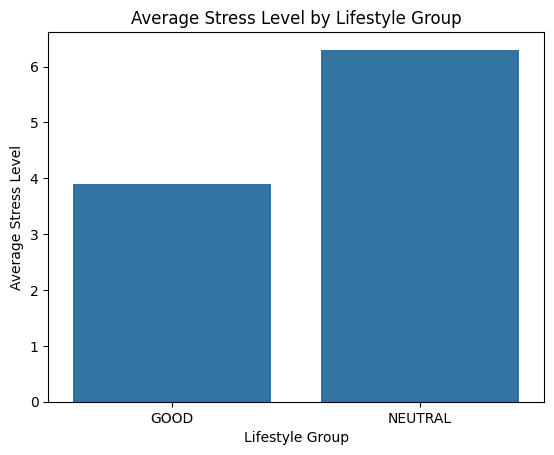

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the average stress level for each lifestyle group
sns.barplot(x=lifestyle_stress.index, y=lifestyle_stress.values)
plt.xlabel('Lifestyle Group')
plt.ylabel('Average Stress Level')
plt.title('Average Stress Level by Lifestyle Group')
plt.show()


**Clustering Analysis (Clustering Based on Groupings)**

With the groupings and other features, you can use clustering algorithms like KMeans, Agglomerative, or even DBSCAN to cluster individuals with similar characteristics.

KMeans Clustering:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select columns for clustering (e.g., physical activity, sleep, stress level, heart rate)
features = df[['Level of Physical Activity (minutes per day)', 'Duration of Sleep (hours)', 'Level of Stress (scale: 1–10)', 'Heart Rate (bpm)']]
features = features.dropna()  # Drop rows with missing values

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering (choose 3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Show the cluster assignments
print(df[['Level of Physical Activity (minutes per day)', 'Duration of Sleep (hours)', 'Level of Stress (scale: 1–10)', 'Heart Rate (bpm)', 'cluster']].head())


   Level of Physical Activity (minutes per day)  Duration of Sleep (hours)  \
0                                            30                        7.5   
1                                            45                        6.8   
2                                            15                        8.2   
3                                            60                        7.0   
4                                            10                        5.5   

   Level of Stress (scale: 1–10)  Heart Rate (bpm)  cluster  
0                              5                72        2  
1                              3                75        1  
2                              8                68        2  
3                              4                70        1  
4                              9                80        0  


**Predictive Modeling (Classification or Regression)**

You can build predictive models to predict specific outcomes, such as predicting the mood output based on the features, or predicting stress levels based on other health factors.

Example - Mood Output Prediction (Classification):

Let's say you want to predict the mood output using features like stress level, sleep duration, and physical activity. You could apply a classification model (e.g., Random Forest, Logistic Regression).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare the data (assuming 'Mood Output' is the target variable)
X = df[['Level of Physical Activity (minutes per day)', 'Duration of Sleep (hours)', 'Level of Stress (scale: 1–10)', 'Heart Rate (bpm)']]
y = df['Mood Output']

# Drop rows with missing values in target or features
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00        45
     Neutral       1.00      1.00      1.00        43
         Sad       1.00      1.00      1.00        60

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



**Visualization of Groupings and Health Indicators**

Visualizing the different groups and their health indicators can be insightful, especially to spot patterns and trends.

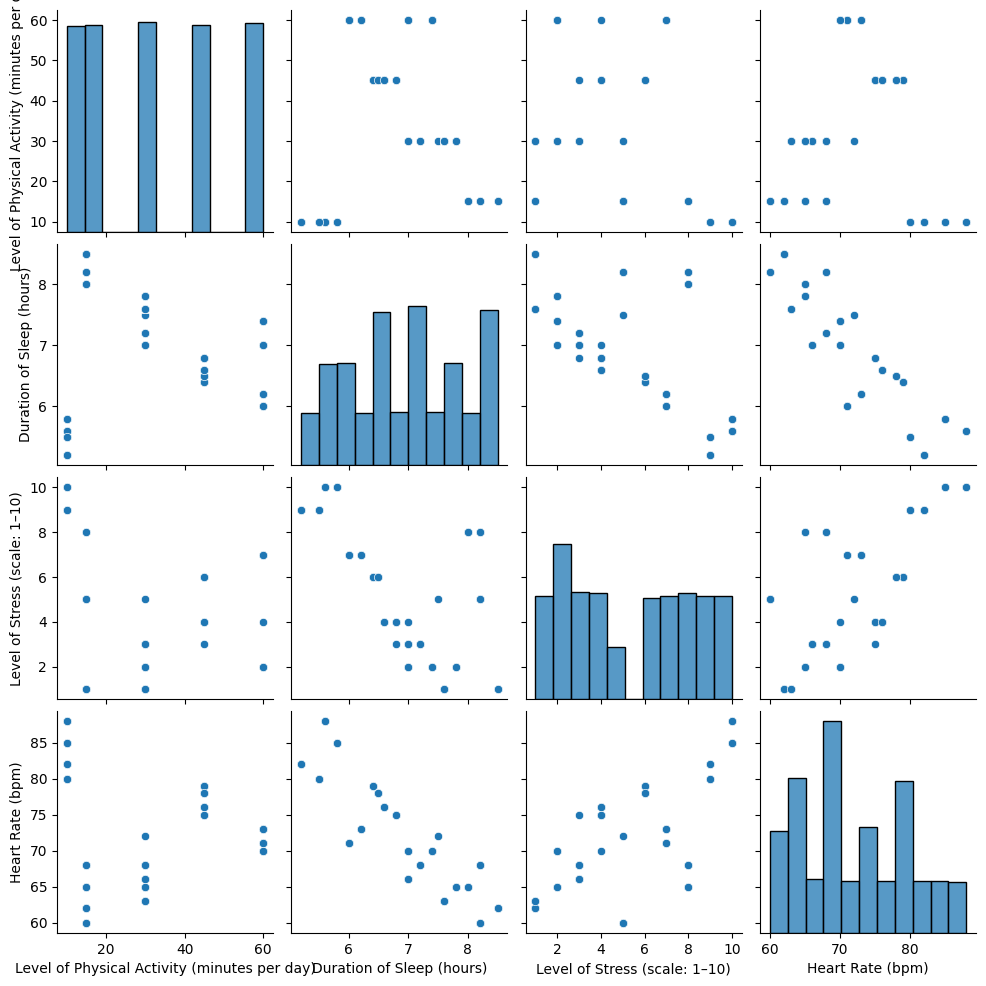

In [ ]:
# Pairplot to check the relationships between selected features (e.g., stress, sleep, activity)
sns.pairplot(df[['Level of Physical Activity (minutes per day)', 'Duration of Sleep (hours)', 'Level of Stress (scale: 1–10)', 'Heart Rate (bpm)']])
plt.show()

**Convert Mood to Numeric and Calculate Mean**

In [ ]:
# Map mood values to numeric
mood_mapping = {'Happy': 1, 'Neutral': 0, 'Sad': -1}
df['mood_output_numeric'] = df['Mood Output'].map(mood_mapping)

# Group by lifestyle and calculate the average mood (numeric)
lifestyle_mood_avg = df.groupby('lifestyle_grouping')['mood_output_numeric'].mean()

# Display the result
print(lifestyle_mood_avg)


lifestyle_grouping
GOOD       0.244068
NEUTRAL   -0.323529
Name: mood_output_numeric, dtype: float64


**Summary Stats for Categorical Columns**

In [ ]:
# Get value counts of mood output by lifestyle group
lifestyle_mood_counts = df.groupby('lifestyle_grouping')['Mood Output'].value_counts()

print(lifestyle_mood_counts)


lifestyle_grouping  Mood Output
GOOD                Happy          147
                    Sad             75
                    Neutral         73
NEUTRAL             Sad            219
                    Neutral        147
                    Happy           76
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('processed_wellness_data.csv')

# Display the first few rows
df.head()


,Duration of Sleep (hours),Level of Physical Activity (minutes per day),Level of Stress (scale: 1–10),BMI Category,Heart Rate (bpm),Systolic and Diastolic Blood Pressure,"Nutrition Intake (calories, breakdown of nutrients, etc.)",Level of Workload (scale: 1–10),Quality or frequency of social interactions,Activities for Mental Health (such as therapy sessions or meditation),...,sleep_health,heart_health,bp_health,lifestyle_grouping,Steps,Activity Level,Mood Classification,stress_profile_grouping,workload_profile_grouping,social_wellness_grouping
0,7.5,30,5,Normal,72,120/80,2000 calories (balanced diet),6,"Good, frequent",Meditation daily,...,GOOD_SLEEP,GOOD_HEART_RATE,POOR_BLOOD_PRESSURE,NEUTRAL,2.0,LIGHTLY_ACTIVE,Neutral,MEDIUM_STRESS: You are experiencing some level...,MEDIUM_WORKLOAD: You are dealing with a modera...,HIGH_SOCIAL
1,6.8,45,3,Overweight,75,118/78,2500 calories (high in carbs),7,"Moderate, occasional",NaN,...,POOR_SLEEP,GOOD_HEART_RATE,GOOD_BLOOD_PRESSURE,NEUTRAL,1.0,SOMEWHAT_ACTIVE,Neutral,LOW_STRESS: You are in a calm and relaxed stat...,MEDIUM_WORKLOAD: You are dealing with a modera...,MODERATE_SOCIAL
2,8.2,15,8,Underweight,68,115/75,1800 calories (low in protein),9,"Low, infrequent",Therapy sessions weekly,...,GOOD_SLEEP,GOOD_HEART_RATE,GOOD_BLOOD_PRESSURE,GOOD,2.0,SEDENTARY,Sad,"HIGH_STRESS: You are under significant stress,...","HIGH_WORKLOAD: Your workload is heavy, and it'...",MODERATE_SOCIAL
3,7.0,60,4,Normal,70,122/82,2200 calories (healthy diet),5,"Very good, daily",Yoga twice a week,...,GOOD_SLEEP,GOOD_HEART_RATE,POOR_BLOOD_PRESSURE,NEUTRAL,2.0,ACTIVE,Sad,LOW_STRESS: You are in a calm and relaxed stat...,MEDIUM_WORKLOAD: You are dealing with a modera...,HIGH_SOCIAL
4,5.5,10,9,Obese,80,130/90,3000 calories (unhealthy),10,"Poor, infrequent",NaN,...,POOR_SLEEP,GOOD_HEART_RATE,POOR_BLOOD_PRESSURE,NEUTRAL,1.0,SEDENTARY,Sad,"HIGH_STRESS: You are under significant stress,...","HIGH_WORKLOAD: Your workload is heavy, and it'...",LOW_SOCIAL


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Preview column names
print("Column Names:\n", df.columns.tolist())

# Clean column names
df.columns = df.columns.str.strip()

### 1. Value Counts for Categorical Columns ###
cat_cols = df.select_dtypes(include=['object']).columns
print("\nValue Counts for Categorical Columns:")
for col in cat_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")

### 2. Convert Mood to Numeric and Summary Stats for Categorical Columns ###
if 'Mood' in df.columns:
    df['Mood_Numeric'] = LabelEncoder().fit_transform(df['Mood'])

print("\nSummary Stats for Categorical Columns:")
print(df.describe(include='object'))

### 3. Mean Mood by Groupings ###
group_cols = ['Gender', 'Age_Group']
group_cols = [col for col in group_cols if col in df.columns]  # ensure they exist

if 'Mood_Numeric' in df.columns and group_cols:
    print("\nMean Mood by Groupings:")
    print(df.groupby(group_cols)['Mood_Numeric'].mean())

### 4. Analyze Relationships Between Groupings ###
print("\nGroup Sizes:")
if group_cols:
    print(df.groupby(group_cols).size())

### 5. Visualization of Groupings ###
if 'Mood_Numeric' in df.columns and all(col in df.columns for col in group_cols):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Gender', y='Mood_Numeric', hue='Age_Group')
    plt.title('Mood by Gender and Age Group')
    plt.show()

### 6. Clustering Analysis ###
features_for_clustering = ['Stress_Level', 'Sleep_Duration', 'Physical_Activity_Level']
features_for_clustering = [col for col in features_for_clustering if col in df.columns]

if features_for_clustering:
    X_scaled = StandardScaler().fit_transform(df[features_for_clustering].dropna())

    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    print("\nCluster Counts:")
    print(df['Cluster'].value_counts())

    # Visualize clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[features_for_clustering[0]], y=df[features_for_clustering[1]], hue=df['Cluster'], palette='Set2')
    plt.title('Clusters based on Health Indicators')
    plt.show()

### 7. Predictive Modeling: Mood Output Prediction ###
model_features = ['Stress_Level', 'Sleep_Duration', 'Physical_Activity_Level']
model_features = [col for col in model_features if col in df.columns]
if 'Mood_Numeric' in df.columns and all(col in df.columns for col in model_features):
    X = df[model_features]
    y = df['Mood_Numeric']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("\nClassification Report for Mood Prediction:")
    print(classification_report(y_test, y_pred))


Column Names:
 ['Duration of Sleep (hours)', 'Level of Physical Activity (minutes per day)', 'Level of Stress (scale: 1–10)', 'BMI Category', 'Heart Rate (bpm)', 'Systolic and Diastolic Blood Pressure', 'Nutrition Intake (calories, breakdown of nutrients, etc.)', 'Level of Workload (scale: 1–10)', 'Quality or frequency of social interactions', 'Activities for Mental Health (such as therapy sessions or meditation)', 'Environmental Aspects (such as weather and air quality)', 'Lifestyle Decisions (such as drinking and smoking)', 'Additional health indicators (e.g., water levels, steps)', 'Mood Output', 'steps_cleaned', 'Consumption Classification', 'activity_level_grouping', 'sleep_health', 'heart_health', 'bp_health', 'lifestyle_grouping', 'Steps', 'Activity Level', 'Mood Classification', 'stress_profile_grouping', 'workload_profile_grouping', 'social_wellness_grouping']

Value Counts for Categorical Columns:

BMI Category:
BMI Category
Normal         297
Overweight     147
Underweight  

<ipython-input-99-045df90bd058>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_data["bmi_category"], y=categorical_data["bmi_counts"], ax=axes[0, 0], palette="Blues_d")
<ipython-input-99-045df90bd058>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_data["mood_output"], y=categorical_data["mood_counts"], ax=axes[0, 1], palette="Greens_d")
<ipython-input-99-045df90bd058>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_data["activity_level_grouping"], y=categorical_data["activity_counts"], ax=axe

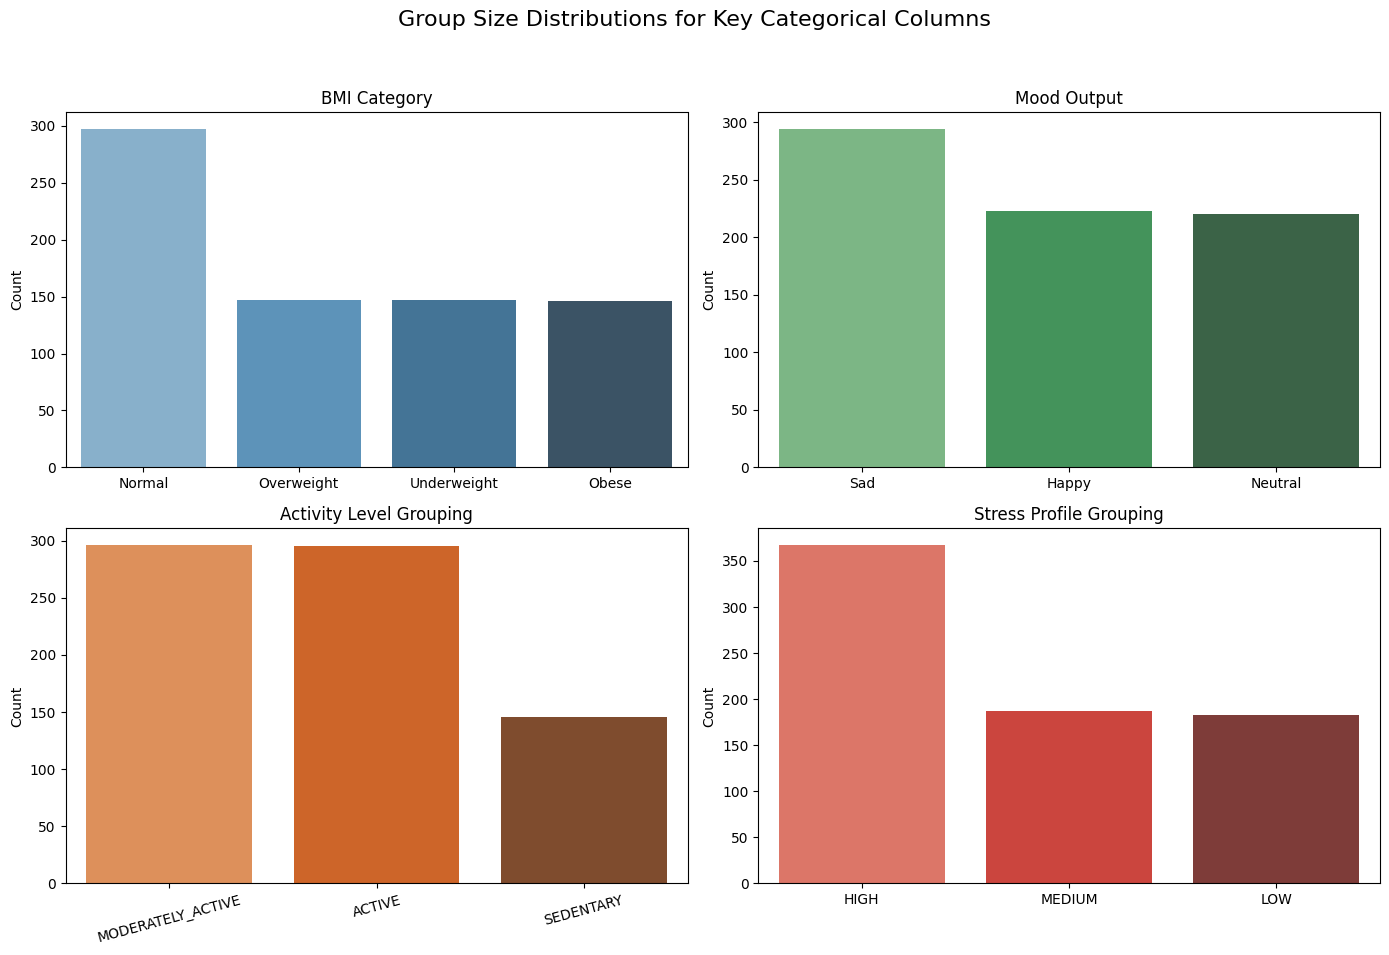

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated categorical summary (abbreviated for visual generation, assuming balanced count structure as provided)
categorical_data = {
    "bmi_category": ["Normal", "Overweight", "Underweight", "Obese"],
    "bmi_counts": [297, 147, 147, 146],
    "mood_output": ["Sad", "Happy", "Neutral"],
    "mood_counts": [294, 223, 220],
    "activity_level_grouping": ["MODERATELY_ACTIVE", "ACTIVE", "SEDENTARY"],
    "activity_counts": [296, 295, 146],
    "stress_profile_grouping": ["HIGH", "MEDIUM", "LOW"],
    "stress_counts": [367, 187, 183],
    "social_wellness_grouping": ["HIGH_SOCIAL", "MODERATE_SOCIAL", "LOW_SOCIAL"],
    "social_counts": [296, 295, 146]
}

# Create a 2x2 grid of barplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Group Size Distributions for Key Categorical Columns", fontsize=16)

# Plot 1: BMI Category
sns.barplot(x=categorical_data["bmi_category"], y=categorical_data["bmi_counts"], ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("BMI Category")
axes[0, 0].set_ylabel("Count")

# Plot 2: Mood Output
sns.barplot(x=categorical_data["mood_output"], y=categorical_data["mood_counts"], ax=axes[0, 1], palette="Greens_d")
axes[0, 1].set_title("Mood Output")
axes[0, 1].set_ylabel("Count")

# Plot 3: Activity Level Grouping
sns.barplot(x=categorical_data["activity_level_grouping"], y=categorical_data["activity_counts"], ax=axes[1, 0], palette="Oranges_d")
axes[1, 0].set_title("Activity Level Grouping")
axes[1, 0].set_ylabel("Count")
axes[1, 0].tick_params(axis='x', rotation=15)

# Plot 4: Stress Profile Grouping
sns.barplot(x=categorical_data["stress_profile_grouping"], y=categorical_data["stress_counts"], ax=axes[1, 1], palette="Reds_d")
axes[1, 1].set_title("Stress Profile Grouping")
axes[1, 1].set_ylabel("Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
